# Python Geospatial Ecosystem in PyGILE-Plus

## Overview

PyGILE-Plus provides a comprehensive Python geospatial ecosystem with over 82 specialized packages covering the full spectrum of geospatial analysis, visualization, and machine learning. This notebook demonstrates the breadth and capabilities of the Python packages available in PyGILE-Plus.

## What Makes PyGILE-Plus Special?

PyGILE-Plus integrates core geospatial libraries like GDAL, GeoPandas, Rasterio, and Shapely with scientific computing tools such as NumPy, Pandas, SciPy, and Scikit-learn. For visualization, it includes Matplotlib, Folium, Plotly, Bokeh, and HoloViews, while web mapping capabilities come from Leafmap, Geemap, and ipyleaflet.

The platform also provides deep learning frameworks including PyTorch, TensorFlow, and Keras, along with cloud and remote sensing tools like PySTAC, Planetary Computer, and Earth Engine API. These Python packages work alongside traditional GIS platforms such as WhiteboxTools, SAGA, GRASS, and OTB.

This tutorial extracts and categorizes all Python packages from the Dockerfile, shows statistics by category, demonstrates key packages with practical examples, and creates interactive visualizations.

## 1. Environment Setup

First, let's set up the PyGILE-Plus environment with the necessary paths and imports.

In [2]:
#!/usr/bin/env python3
"""
PyGILE-Plus Environment Setup
"""
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# Critical environment setup
os.environ['LD_LIBRARY_PATH'] = "/lib/x86_64-linux-gnu:/usr/lib/x86_64-linux-gnu:/opt/conda/envs/pygile/lib"
os.environ['SAGA_CMD'] = '/opt/saga/bin/saga_cmd'
os.environ['SAGA_MLB'] = '/opt/saga/lib/saga'
os.environ['GISBASE'] = '/opt/grass'
os.environ['OTB_APPLICATION_PATH'] = '/opt/otb/lib/otb/applications'

# Add GRASS to Python path
sys.path.insert(0, '/opt/grass/etc/python')

print("PyGILE-Plus environment initialized!")
print("Python version:", sys.version)
print("Working directory:", os.getcwd())

PyGILE-Plus environment initialized!
Python version: 3.10.19 | packaged by conda-forge | (main, Oct 13 2025, 14:08:27) [GCC 14.3.0]
Working directory: /workspace


## 2. Extract All Python Packages

This code extracts all Python packages directly from the PyGILE-Plus Dockerfile and categorizes them by functionality.

In [4]:
#!/usr/bin/env python3
import csv
import pandas as pd

# Packages extracted directly from PyGILE-Plus Dockerfile
dockerfile_packages = [
    # Core geospatial
    "numpy", "gdal", "proj", "geos", "libspatialindex", "boost-cpp",
    "fiona", "shapely", "pyproj", "pandas", "scipy", "matplotlib", 
    "seaborn", "scikit-learn", "geopandas", "rasterio",
    
    # Data formats
    "xarray", "netcdf4", "h5py", "h5netcdf", "zarr",
    
    # Jupyter
    "jupyter", "jupyterlab", "ipywidgets",
    
    # Visualization
    "plotly", "bokeh", "folium", "contextily", "mapclassify",
    "holoviews", "hvplot", "pythreejs",
    
    # Geospatial analysis
    "osmnx", "earthpy", "geoplot",
    
    # Image processing
    "scikit-image", "tifffile", "imageio-ffmpeg", "opencv",
    
    # Web mapping
    "localtileserver", "rio-cogeo", "rioxarray", "ipyleaflet", 
    "owslib", "geemap", "leafmap",
    
    # Optional packages
    "census", "us", "pykrige", "palettable", "geojson",
    
    # Cloud tools
    "pystac", "stackstac", "planetary-computer",
    
    # GIS platforms
    "whitebox_tools",
    
    # Deep Learning
    "pytorch-cpu", "torchvision", "torchaudio", "pytorch-lightning",
    "tensorflow", "keras", "albumentations", "timm",
    
    # Additional packages (from pip installs)
    "pygis", "earthengine-api", "sklearn-xarray", "sphinx", 
    "sphinx_sitemap", "sphinxcontrib.bibtex", "sphinx_inline_tabs", 
    "pydata-sphinx-theme", "sankee", "overturemaps", "whiteboxgui",
    "jupyter-book", "ghp-import", "numpy-groupies", "sympy",
    "geojson", "dask-geopandas", "pykrige", "cenpy", "census", 
    "us", "sklearn-xarray", "whitebox", "PySAGA-cmd", "pyspatialml"
]

def categorize_package(pkg_name):
    """Categorize packages based on Dockerfile groupings"""
    pkg_lower = pkg_name.lower()
    
    if pkg_name in ["gdal", "proj", "geos", "fiona", "shapely", "pyproj", "geopandas", "rasterio"]:
        return "Geospatial Core"
    elif pkg_name in ["numpy", "pandas", "scipy", "matplotlib", "seaborn", "scikit-learn"]:
        return "Scientific Computing"
    elif pkg_name in ["xarray", "netcdf4", "h5py", "h5netcdf", "zarr"]:
        return "Data Formats"
    elif pkg_name in ["jupyter", "jupyterlab", "ipywidgets"]:
        return "Jupyter Environment"
    elif pkg_name in ["plotly", "bokeh", "folium", "contextily", "holoviews", "hvplot", "pythreejs"]:
        return "Visualization"
    elif pkg_name in ["geemap", "leafmap", "ipyleaflet", "owslib"]:
        return "Web Mapping"
    elif pkg_name in ["scikit-image", "opencv", "tifffile", "imageio-ffmpeg"]:
        return "Image Processing"
    elif pkg_name in ["osmnx", "earthpy", "geoplot"]:
        return "Geospatial Analysis"
    elif pkg_name in ["pystac", "stackstac", "planetary-computer", "earthengine-api"]:
        return "Cloud/Remote Sensing"
    elif pkg_name in ["whitebox_tools", "PySAGA-cmd", "pyspatialml"]:
        return "GIS Platforms"
    elif pkg_name in ["pytorch-cpu", "torchvision", "torchaudio", "pytorch-lightning", "tensorflow", "keras", "albumentations", "timm"]:
        return "Deep Learning"
    elif pkg_name in ["sphinx", "sphinx_sitemap", "jupyter-book", "ghp-import"]:
        return "Documentation"
    elif pkg_name in ["census", "us", "pykrige", "palettable", "geojson"]:
        return "Specialized Tools"
    else:
        return "Other"

# Remove duplicates while preserving order
seen = set()
unique_packages = []
for pkg in dockerfile_packages:
    if pkg not in seen:
        seen.add(pkg)
        unique_packages.append(pkg)

# Create DataFrame
package_data = []
for pkg in unique_packages:
    package_data.append({
        'Package': pkg,
        'Category': categorize_package(pkg)
    })

df_packages = pd.DataFrame(package_data)

print(f"Total Python packages in PyGILE-Plus: {len(df_packages)}")
print(f"\nPackages by category:")
print(df_packages['Category'].value_counts().to_string())

Total Python packages in PyGILE-Plus: 83

Packages by category:
Category
Other                   19
Geospatial Core          8
Deep Learning            8
Visualization            7
Scientific Computing     6
Data Formats             5
Specialized Tools        5
Image Processing         4
Web Mapping              4
Cloud/Remote Sensing     4
Documentation            4
Jupyter Environment      3
Geospatial Analysis      3
GIS Platforms            3


## 3. Package Statistics and Visualization

Let's visualize the distribution of packages across different categories.

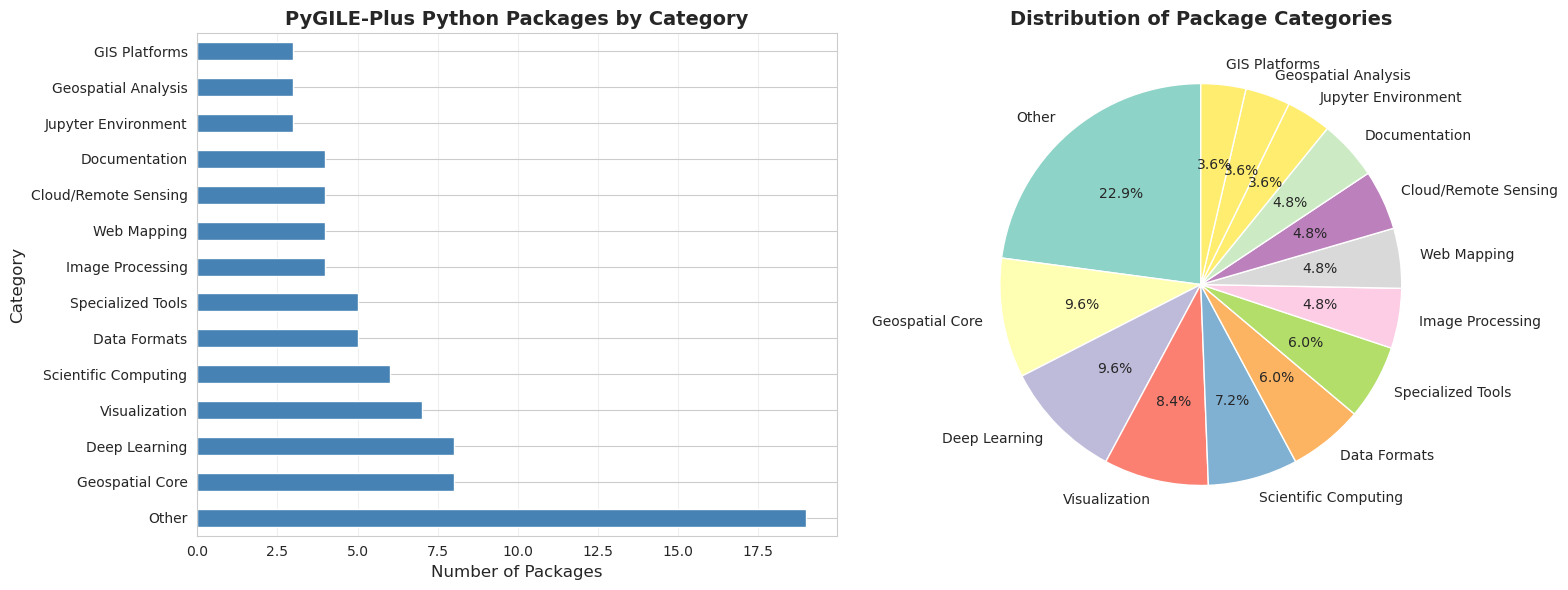


Detailed Package Statistics:

Other (19 packages):
  libspatialindex, boost-cpp, mapclassify, localtileserver, rio-cogeo...

Geospatial Core (8 packages):
  gdal, proj, geos, fiona, shapely...

Deep Learning (8 packages):
  pytorch-cpu, torchvision, torchaudio, pytorch-lightning, tensorflow...

Visualization (7 packages):
  plotly, bokeh, folium, contextily, holoviews...

Scientific Computing (6 packages):
  numpy, pandas, scipy, matplotlib, seaborn...

Data Formats (5 packages):
  xarray, netcdf4, h5py, h5netcdf, zarr

Specialized Tools (5 packages):
  census, us, pykrige, palettable, geojson

Image Processing (4 packages):
  scikit-image, tifffile, imageio-ffmpeg, opencv

Web Mapping (4 packages):
  ipyleaflet, owslib, geemap, leafmap

Cloud/Remote Sensing (4 packages):
  pystac, stackstac, planetary-computer, earthengine-api

Documentation (4 packages):
  sphinx, sphinx_sitemap, jupyter-book, ghp-import

Jupyter Environment (3 packages):
  jupyter, jupyterlab, ipywidgets

Geospatia

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create category counts
category_counts = df_packages['Category'].value_counts()

# Create bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
category_counts.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_xlabel('Number of Packages', fontsize=12)
ax1.set_ylabel('Category', fontsize=12)
ax1.set_title('PyGILE-Plus Python Packages by Category', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Pie chart
colors = plt.cm.Set3(range(len(category_counts)))
ax2.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
ax2.set_title('Distribution of Package Categories', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Display detailed statistics
print("\nDetailed Package Statistics:")
print("=" * 50)
for category in category_counts.index:
    packages = df_packages[df_packages['Category'] == category]['Package'].tolist()
    print(f"\n{category} ({len(packages)} packages):")
    print(f"  {', '.join(packages[:5])}{'...' if len(packages) > 5 else ''}")

## 4. GeoPandas Example

GeoPandas extends pandas to enable spatial operations on geometric types. Let's create a simple example with some sample geometries.

GeoPandas DataFrame:
          City  Longitude  Latitude  Population                     geometry
0     New York   -74.0060   40.7128     8336817   POINT (-74.00600 40.71280)
1  Los Angeles  -118.2437   34.0522     3979576  POINT (-118.24370 34.05220)
2      Chicago   -87.6298   41.8781     2693976   POINT (-87.62980 41.87810)
3      Houston   -95.3698   29.7604     2320268   POINT (-95.36980 29.76040)
4      Phoenix  -112.0740   33.4484     1680992  POINT (-112.07400 33.44840)

CRS: EPSG:4326


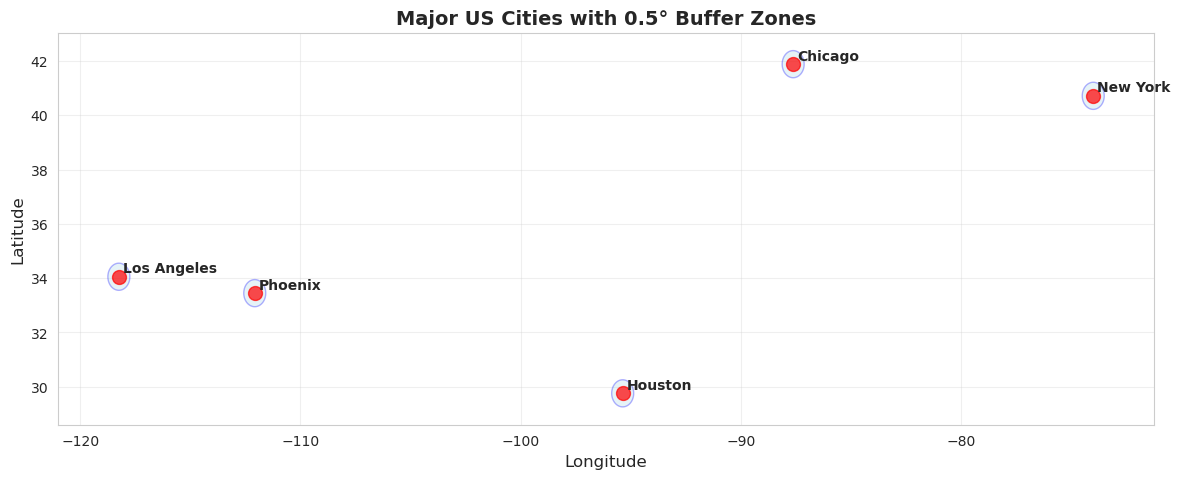


Spatial Statistics:
Total buffer area: 3.92 square degrees
Average distance between cities: 24.23 degrees


In [6]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Create sample points representing cities
cities = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Longitude': [-74.0060, -118.2437, -87.6298, -95.3698, -112.0740],
    'Latitude': [40.7128, 34.0522, 41.8781, 29.7604, 33.4484],
    'Population': [8336817, 3979576, 2693976, 2320268, 1680992]
}

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(cities['Longitude'], cities['Latitude'])]
gdf_cities = gpd.GeoDataFrame(cities, geometry=geometry, crs='EPSG:4326')

print("GeoPandas DataFrame:")
print(gdf_cities)
print(f"\nCRS: {gdf_cities.crs}")

# Create a simple buffer around each city (0.5 degrees)
gdf_cities['buffer'] = gdf_cities.buffer(0.5)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
gdf_cities.set_geometry('buffer').plot(ax=ax, alpha=0.3, color='lightblue', edgecolor='blue')
gdf_cities.plot(ax=ax, color='red', markersize=100, alpha=0.7)

# Add city labels
for idx, row in gdf_cities.iterrows():
    ax.annotate(row['City'], xy=(row.geometry.x, row.geometry.y), 
                xytext=(3, 3), textcoords='offset points', fontsize=10, fontweight='bold')

ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_title('Major US Cities with 0.5° Buffer Zones', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate some spatial statistics
print(f"\nSpatial Statistics:")
print(f"Total buffer area: {gdf_cities.set_geometry('buffer').area.sum():.2f} square degrees")
print(f"Average distance between cities: {gdf_cities.geometry.distance(gdf_cities.geometry.iloc[0]).mean():.2f} degrees")

## 5. Xarray for Multidimensional Data

Xarray is perfect for working with labeled multidimensional arrays, commonly used for climate and remote sensing data.

Xarray Dataset:
<xarray.Dataset> Size: 295kB
Dimensions:      (time: 365, latitude: 10, longitude: 10)
Coordinates:
  * time         (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-30
  * latitude     (latitude) int64 80B 30 32 34 36 38 40 42 44 46 48
  * longitude    (longitude) int64 80B -120 -115 -110 -105 ... -90 -85 -80 -75
Data variables:
    temperature  (time, latitude, longitude) float64 292kB -3.51 ... -14.3
Attributes:
    description:  Synthetic temperature data for demonstration


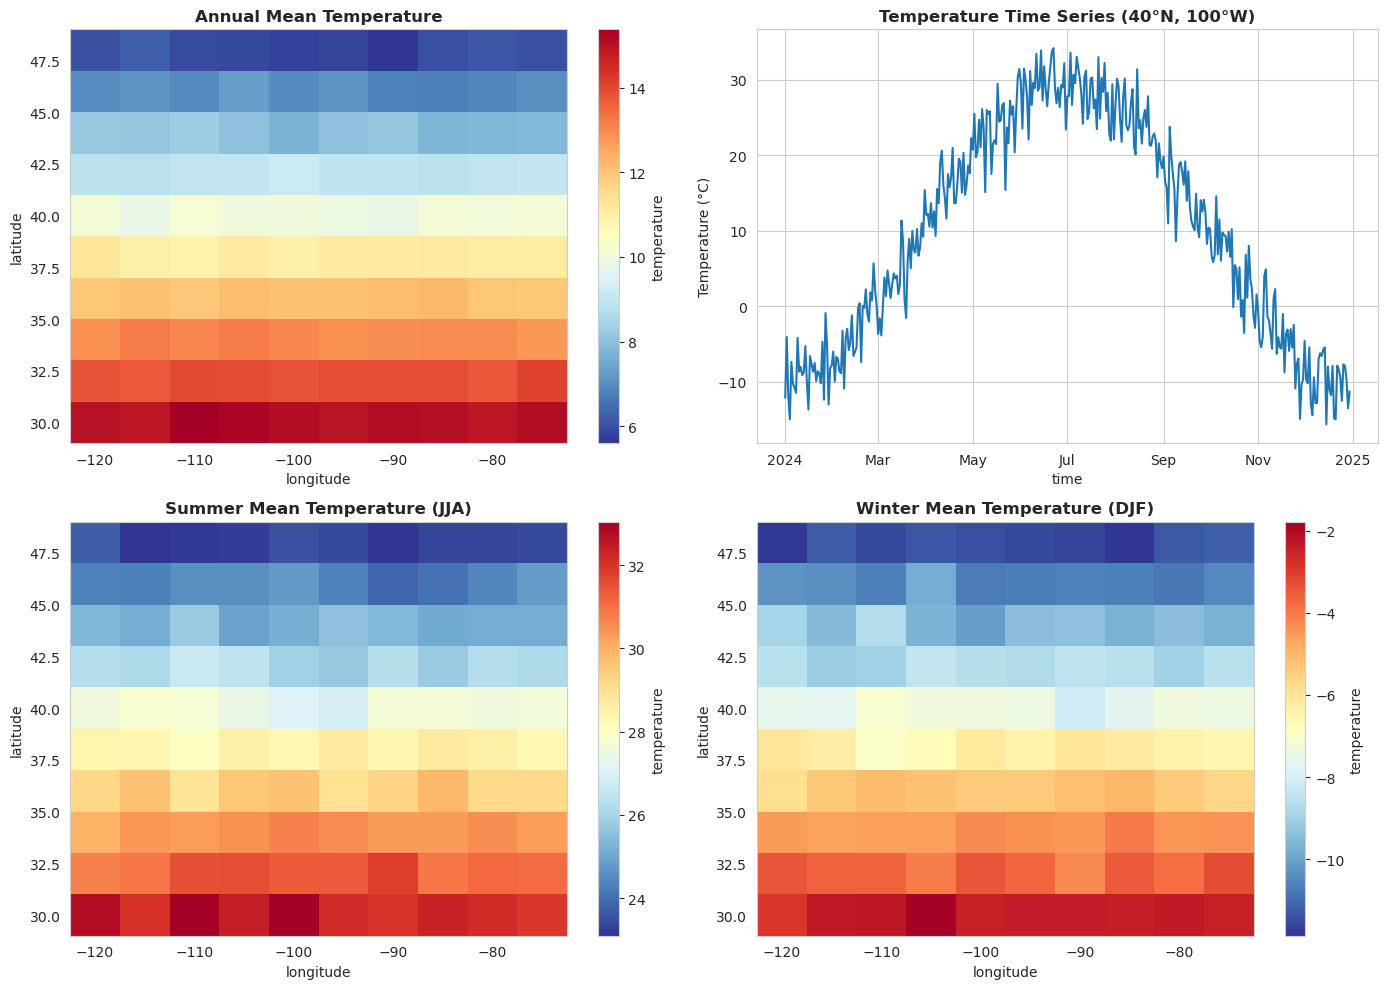


Temperature Statistics:
Annual mean: 10.49°C
Annual std: 14.74°C
Min temperature: -23.66°C
Max temperature: 44.47°C


In [7]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create sample temperature data
# Simulate daily temperature data for a year
np.random.seed(42)
days = 365
lats = np.arange(30, 50, 2)  # 10 latitudes
lons = np.arange(-120, -70, 5)  # 10 longitudes

# Create synthetic temperature data with seasonal variation
time = np.arange(days)

# FIX: Shift phase so Jan=cold, July=hot
# sin peaks at day 182 (July 1), bottoms at day 0 (Jan 1)
seasonal = 20 * np.sin(2 * np.pi * (time - 91) / 365) + 15

# Add spatial variation
temperature = np.zeros((days, len(lats), len(lons)))
for i, lat in enumerate(lats):
    for j, lon in enumerate(lons):
        # Temperature decreases with latitude
        lat_effect = -0.5 * (lat - 30)
        # Add random noise
        noise = np.random.randn(days) * 3
        temperature[:, i, j] = seasonal + lat_effect + noise

# Create xarray Dataset
ds = xr.Dataset(
    {
        'temperature': (['time', 'latitude', 'longitude'], temperature),
    },
    coords={
        'time': pd.date_range('2024-01-01', periods=days),
        'latitude': lats,
        'longitude': lons,
    },
    attrs={'description': 'Synthetic temperature data for demonstration'}
)

print("Xarray Dataset:")
print(ds)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Annual mean temperature
ds['temperature'].mean(dim='time').plot(ax=axes[0, 0], cmap='RdYlBu_r')
axes[0, 0].set_title('Annual Mean Temperature', fontweight='bold')

# Plot 2: Time series at a single location
ds['temperature'].sel(latitude=40, longitude=-100, method='nearest').plot(ax=axes[0, 1])
axes[0, 1].set_title('Temperature Time Series (40°N, 100°W)', fontweight='bold')
axes[0, 1].set_ylabel('Temperature (°C)')

# Plot 3: Summer mean (June-August)
summer_mean = ds['temperature'].sel(time=ds['time.season'] == 'JJA').mean(dim='time')
summer_mean.plot(ax=axes[1, 0], cmap='RdYlBu_r')
axes[1, 0].set_title('Summer Mean Temperature (JJA)', fontweight='bold')

# Plot 4: Winter mean (December-February)
winter_mean = ds['temperature'].sel(time=ds['time.season'] == 'DJF').mean(dim='time')
winter_mean.plot(ax=axes[1, 1], cmap='RdYlBu_r')
axes[1, 1].set_title('Winter Mean Temperature (DJF)', fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nTemperature Statistics:")
print(f"Annual mean: {ds['temperature'].mean().values:.2f}°C")
print(f"Annual std: {ds['temperature'].std().values:.2f}°C")
print(f"Min temperature: {ds['temperature'].min().values:.2f}°C")
print(f"Max temperature: {ds['temperature'].max().values:.2f}°C")

## 6. Rasterio for Raster Data

Rasterio provides efficient access to geospatial raster data. Let's create and analyze a sample raster dataset.

Created sample DEM raster

Raster Metadata:
  Dimensions: 500 x 500
  CRS: EPSG:4326
  Bounds: BoundingBox(left=-120.5, bottom=35.5, right=-119.5, top=36.5)

Elevation Statistics:
  Min: -245.45 m
  Max: 1391.63 m
  Mean: 399.07 m
  Std: 331.49 m


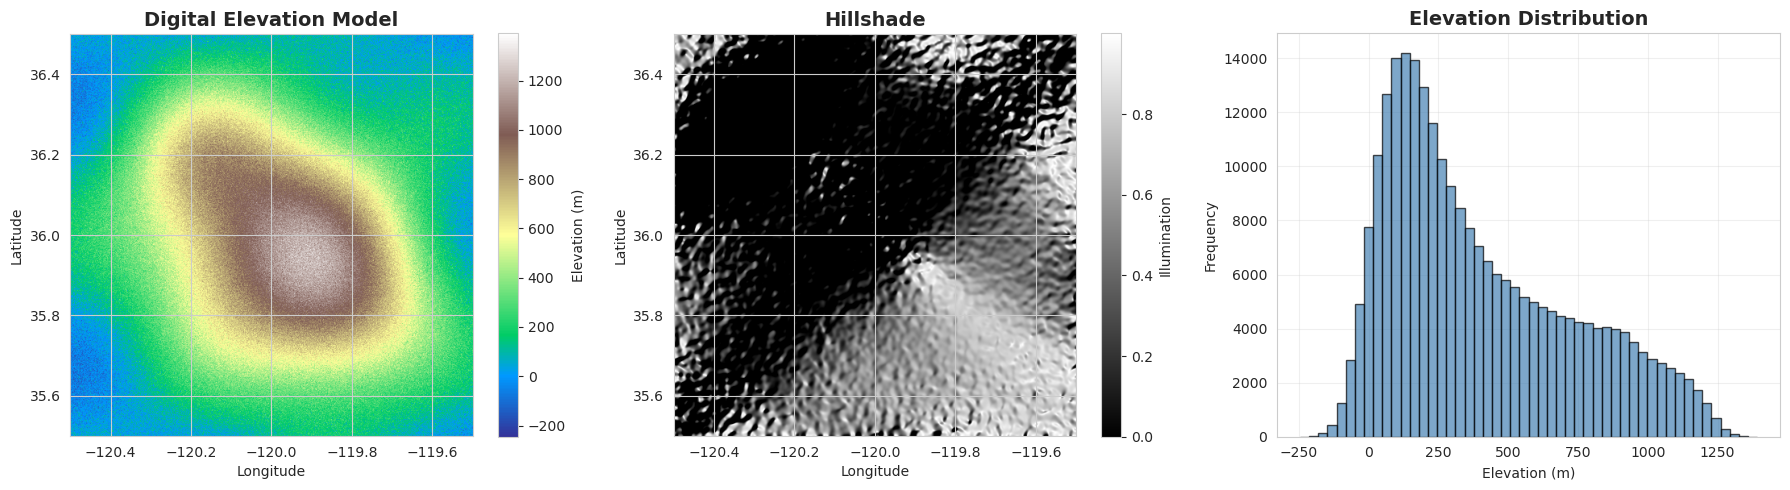


Raster file saved to: /tmp/sample_dem.tif


In [8]:
import rasterio
from rasterio.transform import from_bounds
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Create synthetic elevation data (DEM)
width, height = 500, 500
x = np.linspace(-5, 5, width)
y = np.linspace(-5, 5, height)
X, Y = np.meshgrid(x, y)

# Create synthetic terrain
elevation = (
    1000 * np.exp(-(X**2 + Y**2) / 10) +  # Central peak
    500 * np.exp(-((X-2)**2 + (Y-2)**2) / 5) +  # Secondary peak
    300 * np.exp(-((X+2)**2 + (Y+2)**2) / 3) +  # Another hill
    100 * np.sin(X) * np.cos(Y) +  # Undulating terrain
    50 * np.random.randn(height, width)  # Noise
)

# Define spatial extent
west, south, east, north = -120.5, 35.5, -119.5, 36.5
transform = from_bounds(west, south, east, north, width, height)
extent = [west, east, south, north]

# Create temporary raster file
temp_raster = '/tmp/sample_dem.tif'

# Write raster
with rasterio.open(
    temp_raster,
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=elevation.dtype,
    crs='EPSG:4326',
    transform=transform,
) as dst:
    dst.write(elevation, 1)

print("Created sample DEM raster")

# Read and analyze
with rasterio.open(temp_raster) as src:
    print(f"\nRaster Metadata:")
    print(f"  Dimensions: {src.width} x {src.height}")
    print(f"  CRS: {src.crs}")
    print(f"  Bounds: {src.bounds}")
    
    dem = src.read(1)
    
    print(f"\nElevation Statistics:")
    print(f"  Min: {dem.min():.2f} m")
    print(f"  Max: {dem.max():.2f} m")
    print(f"  Mean: {dem.mean():.2f} m")
    print(f"  Std: {dem.std():.2f} m")
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Plot 1: Elevation map
    im1 = axes[0].imshow(dem, cmap='terrain', extent=extent, origin='upper')
    axes[0].set_title('Digital Elevation Model', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    plt.colorbar(im1, ax=axes[0], label='Elevation (m)')
    
    # Plot 2: Hillshade - SMOOTH DEM FIRST to remove noise
    dem_smooth = gaussian_filter(dem, sigma=3)
    
    azimuth = 315
    altitude = 45
    
    dy, dx = np.gradient(dem_smooth)
    azimuth_rad = np.radians(360 - azimuth + 90)
    altitude_rad = np.radians(altitude)
    
    slope = np.arctan(np.sqrt(dx**2 + dy**2))
    aspect = np.arctan2(-dy, dx)
    
    hillshade = (np.cos(altitude_rad) * np.cos(slope) + 
                 np.sin(altitude_rad) * np.sin(slope) * np.cos(azimuth_rad - aspect))
    hillshade = np.clip(hillshade, 0, 1)
    
    im2 = axes[1].imshow(hillshade, cmap='gray', extent=extent, origin='upper')
    axes[1].set_title('Hillshade', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    plt.colorbar(im2, ax=axes[1], label='Illumination')
    
    # Plot 3: Elevation histogram
    axes[2].hist(dem.flatten(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[2].set_title('Elevation Distribution', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Elevation (m)')
    axes[2].set_ylabel('Frequency')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print(f"\nRaster file saved to: {temp_raster}")

## 7. Interactive Web Maps with Folium

Folium creates interactive web maps using Leaflet.js. Perfect for sharing geospatial visualizations.

In [10]:
import folium
from folium import plugins

# Create a base map centered on the US
m = folium.Map(
    location=[39.8283, -98.5795],  # Geographic center of US
    zoom_start=4,
    tiles='OpenStreetMap'
)

# Add city markers from our GeoPandas example
cities_data = [
    {'name': 'New York', 'coords': [40.7128, -74.0060], 'pop': 8336817},
    {'name': 'Los Angeles', 'coords': [34.0522, -118.2437], 'pop': 3979576},
    {'name': 'Chicago', 'coords': [41.8781, -87.6298], 'pop': 2693976},
    {'name': 'Houston', 'coords': [29.7604, -95.3698], 'pop': 2320268},
    {'name': 'Phoenix', 'coords': [33.4484, -112.0740], 'pop': 1680992},
]

# Add markers with popups
for city in cities_data:
    # Create circle markers sized by population
    folium.CircleMarker(
        location=city['coords'],
        radius=city['pop'] / 200000,  # Scale radius by population
        popup=f"<b>{city['name']}</b><br>Population: {city['pop']:,}",
        color='darkred',
        fill=True,
        fillColor='red',
        fillOpacity=0.6,
    ).add_to(m)
    
    # Add city label
    folium.Marker(
        location=city['coords'],
        icon=folium.DivIcon(html=f'<div style="font-size: 12pt; color: black; font-weight: bold;">{city["name"]}</div>')
    ).add_to(m)

# Add a heatmap layer
heat_data = [[city['coords'][0], city['coords'][1], city['pop']/1000000] for city in cities_data]
plugins.HeatMap(heat_data, radius=50, blur=35, max_zoom=8).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Add fullscreen option
plugins.Fullscreen().add_to(m)

# Add measure control
plugins.MeasureControl(position='topleft', primary_length_unit='kilometers').add_to(m)

# Add minimap
minimap = plugins.MiniMap(toggle_display=True)
m.add_child(minimap)

# Save map
map_file = '/tmp/us_cities_map.html'
m.save(map_file)

print(f"Interactive map created!")
print(f"Map saved to: {map_file}")
print(f"\nFeatures:")
print(f"  - Circle markers sized by population")
print(f"  - Population heatmap")
print(f"  - Interactive popups")
print(f"  - Fullscreen mode")
print(f"  - Distance measurement tool")
print(f"  - Minimap for navigation")

# Display the map
m

Interactive map created!
Map saved to: /tmp/us_cities_map.html

Features:
  - Circle markers sized by population
  - Population heatmap
  - Interactive popups
  - Fullscreen mode
  - Distance measurement tool
  - Minimap for navigation


## 8. Machine Learning with Scikit-learn

PyGILE-Plus includes powerful ML libraries. Let's demonstrate spatial clustering.

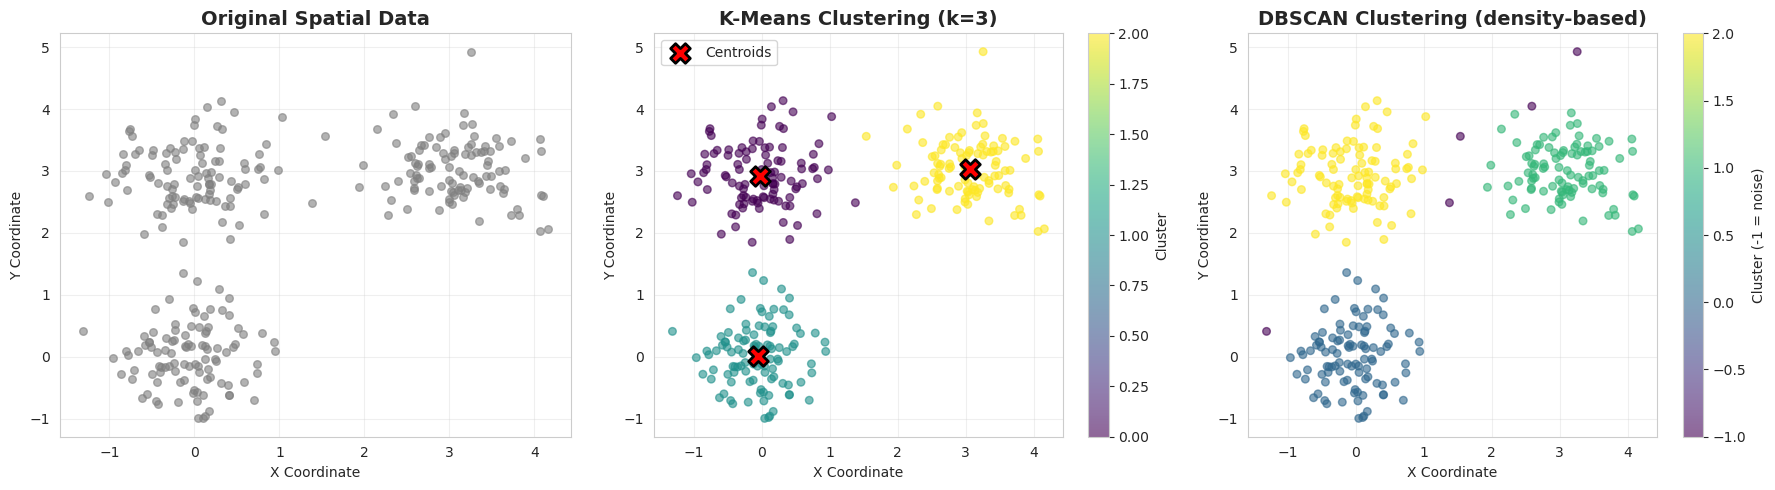

Clustering Results:

K-Means:
  Number of clusters: 3
  Inertia: 139.10

DBSCAN:
  Number of clusters: 3
  Number of noise points: 5


In [11]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic spatial data
np.random.seed(42)
n_samples = 300

# Create three clusters of points
cluster1 = np.random.randn(n_samples//3, 2) * 0.5 + np.array([0, 0])
cluster2 = np.random.randn(n_samples//3, 2) * 0.5 + np.array([3, 3])
cluster3 = np.random.randn(n_samples//3, 2) * 0.5 + np.array([0, 3])

X = np.vstack([cluster1, cluster2, cluster3])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original data
axes[0].scatter(X[:, 0], X[:, 1], c='gray', alpha=0.6, s=30)
axes[0].set_title('Original Spatial Data', fontsize=14, fontweight='bold')
axes[0].set_xlabel('X Coordinate')
axes[0].set_ylabel('Y Coordinate')
axes[0].grid(True, alpha=0.3)

# K-Means results
scatter1 = axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6, s=30)
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                c='red', marker='X', s=200, edgecolors='black', linewidths=2, label='Centroids')
axes[1].set_title('K-Means Clustering (k=3)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('X Coordinate')
axes[1].set_ylabel('Y Coordinate')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[1], label='Cluster')

# DBSCAN results
scatter2 = axes[2].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6, s=30)
axes[2].set_title('DBSCAN Clustering (density-based)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('X Coordinate')
axes[2].set_ylabel('Y Coordinate')
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[2], label='Cluster (-1 = noise)')

plt.tight_layout()
plt.show()

# Print statistics
print("Clustering Results:")
print("=" * 50)
print(f"\nK-Means:")
print(f"  Number of clusters: 3")
print(f"  Inertia: {kmeans.inertia_:.2f}")

print(f"\nDBSCAN:")
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"  Number of clusters: {n_clusters}")
print(f"  Number of noise points: {n_noise}")

## Summary

This notebook demonstrated the rich Python geospatial ecosystem available in PyGILE-Plus. The 82 package clusters span several categories including geospatial core libraries like GDAL, GeoPandas, Rasterio, Shapely, Fiona, and PyProj. Scientific computing is handled by NumPy, Pandas, SciPy, and Scikit-learn. Visualization options include Matplotlib, Seaborn, Plotly, Bokeh, Folium, and HoloViews, while web mapping is supported through Leafmap, Geemap, and ipyleaflet. Deep learning frameworks like PyTorch, TensorFlow, Keras, and Albumentations are also available, along with cloud and remote sensing tools such as PySTAC, Planetary Computer, and Earth Engine API. Data format support includes Xarray, NetCDF4, HDF5, and Zarr.

Through the examples above, we demonstrated vector data manipulation with GeoPandas, multidimensional array processing with Xarray, raster data analysis with Rasterio, interactive web mapping with Folium, and spatial machine learning with Scikit-learn.

These Python packages integrate with the GIS platforms in PyGILE-Plus, which include SAGA GIS with 733 algorithms, GRASS GIS with 500 algorithms, OTB with 230 algorithms, and WhiteboxTools with 460 algorithms. Together this provides over 1,773 algorithms plus 82 Python packages for comprehensive geospatial analysis.

## Next Steps

From here you can explore individual package tutorials, combine multiple packages for complex workflows, integrate Python with SAGA, GRASS, and OTB for comprehensive analysis, or develop custom geospatial applications.

## Resources

For more information, visit the GeoPandas documentation at geopandas.org, Rasterio documentation at rasterio.readthedocs.io, Xarray documentation at xarray.pydata.org, Folium documentation at python-visualization.github.io/folium, and the PyGILE-Plus GitHub repository.